In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
event=[i for i in dir(cv2) if "EVENT" in i]
print(event)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [4]:
def draw_circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),30,(0,255,255),-1)
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",draw_circle)
while True:
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF==27:
        break
cv2.destroyAllWindows()

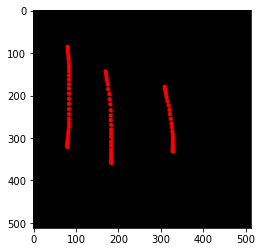

In [7]:
drawing=False
def brush(event,x,y,flags,param):
    global drawing
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",brush)
while True:
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.show()  
    

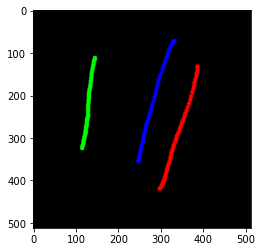

In [8]:
drawing=False
color=(0,255,0)
def brush(event,x,y,flags,param):
    global drawing,color
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(img,(x,y),5,color,-1)
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False   
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",brush)
while True:
    cv2.imshow("image",img)
    k=cv2.waitKey(1) & 0xFF
    if k==ord('b'):
        color=(255,0,0)
    elif k==ord("g"):
        color=(0,255,0)
    elif k==ord("r"):
        color=(0,0,255)
    elif k==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.show()  

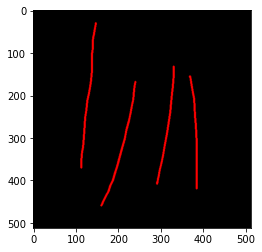

In [13]:
drawing=False
ix=0
iy=0
def brush(event,x,y,flags,param):
    global drawing,ix,iy
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix=x
        iy=y
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=(0,0,255),thickness=3)
            ix=x
            iy=y
            
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",brush)
while True:
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.show()  

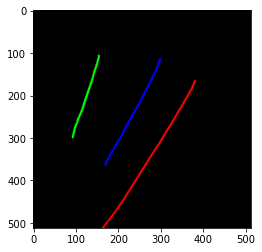

In [16]:
drawing=False
ix=0
iy=0
color=(0,255,0)
def brush(event,x,y,flags,param):
    global drawing,color,ix,iy
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix=x
        iy=y
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=color,thickness=3)
            ix=x
            iy=y
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False   
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",brush)
while True:
    cv2.imshow("image",img)
    k=cv2.waitKey(1) & 0xFF
    if k==ord('b'):
        color=(255,0,0)
    elif k==ord("g"):
        color=(0,255,0)
    elif k==ord("r"):
        color=(0,0,255)
    elif k==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.show()  

[[(128, 52), (405, 275)]]


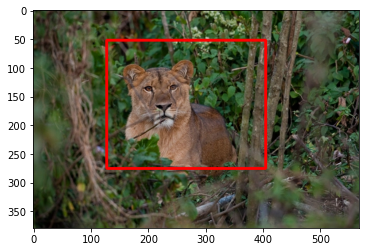

In [20]:
drawing=False
points=[]
start_point=(0,0)
def draw_rec(event,x,y,flags,param):
    global drawing,start_point
    if event==cv2.EVENT_LBUTTONDOWN:
        start_point=(x,y)
    elif event==cv2.EVENT_LBUTTONUP:
        points.append([start_point,(x,y)])  
        cv2.rectangle(img,start_point,(x,y),(0,0,255),3)
        cv2.imshow("image",img)
img=cv2.imread(r"C:\\Users\Student\Desktop\pic02\006.jpg")
clone=img.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image",draw_rec)
while True:
    cv2.imshow("image",img)
    key=cv2.waitKey(1) & 0xFF
    if key==ord("r"):
        img=clone.copy()
        points=[]
    elif key==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)
plt.show()  
    

[[(126, 63), (395, 294)]]


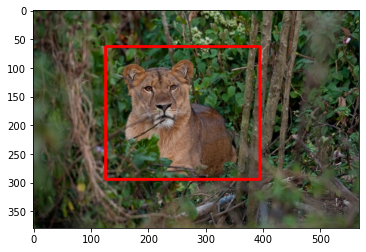

In [27]:
drawing=False
points=[]
start_point=(0,0)
def draw_rec_with_undo(event,x,y,flags,param):
    global drawing,start_point,points
    if event==cv2.EVENT_LBUTTONDOWN:
        start_point=(x,y)
        drawing=True
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp_img=img.copy()
            cv2.rectangle(temp_img,start_point,(x,y),(0,0,255),3)
            cv2.imshow("image",temp_img)
        
    elif event==cv2.EVENT_LBUTTONUP:
        points.append([start_point,(x,y)])  
        cv2.rectangle(img,start_point,(x,y),(0,0,255),3)
        drawing=False
        cv2.imshow("image",img)
img=cv2.imread(r"C:\\Users\Student\Desktop\pic02\006.jpg")
clone=img.copy()
temp_img=img.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image",draw_rec_with_undo)
while True:
    if drawing==False:
        cv2.imshow("image",img)
    key=cv2.waitKey(1) & 0xFF
    if key==ord("r"):
        img=clone.copy()
        points=[]
    elif key==ord("z"):
        img=clone.copy()
        points.pop()
        for p in points:
            cv2.rectangle(img,p[0],p[1],(0,0,255),3)
    elif key==27:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(points)
plt.show()  